In [1]:
!pip install git+https://github.com/bxt-kk/vikit-learn.git

  Cloning https://github.com/bxt-kk/vikit-learn.git to /tmp/pip-req-build-dvq5huve
  Running command git clone --filter=blob:none --quiet https://github.com/bxt-kk/vikit-learn.git /tmp/pip-req-build-dvq5huve
  Resolved https://github.com/bxt-kk/vikit-learn.git to commit bef5a9320558027067d4f658e7812485844800f2
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.3/596.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 27.4 MB/s eta 0:00:00
  Created wheel for vikit-learn: filename=vikit_learn-0.0.1-py3-none-any.whl size=37690 sha256=feb721a582fcd175d611b46e8dcf354a7eeb94caa37ce27201fe5e8e27684e74
  Stored in directory: /tmp/pip-ephem-wheel-cache-lfpsu9_4/wheels/ba/a5/2b/6c981b4fb807523a31b616b17bfbc3360ead4e0a33b95179da
Successfully built vikit-learn


In [2]:
import torch
torch.manual_seed(3)
from torch.utils.data import DataLoader

from vklearn.trainer.trainer import Trainer
from vklearn.trainer.tasks import Detection
from vklearn.models.trimnetdet import TrimNetDet as Model
from vklearn.datasets.plain_bbox import PlainBBox

In [3]:
dataset_root = '/kaggle/input/blood-cell-detection-datatset'

train_transforms, test_transforms = Model.get_transforms('cocox640')

train_data = PlainBBox(
    dataset_root,
    split='train',
    transforms=train_transforms)
test_data = PlainBBox(
    dataset_root,
    split='valid',
    transforms=test_transforms)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Model(
    categories=['Platelets', 'RBC', 'WBC'],
)

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 33.6MB/s]


In [4]:
batch_size = 16

train_loader = DataLoader(
    train_data, batch_size,
    shuffle=True,
    drop_last=True,
    collate_fn=model.collate_fn,
    num_workers=4)
test_loader = DataLoader(
    test_data, batch_size,
    shuffle=True,
    drop_last=True,
    collate_fn=model.collate_fn,
    num_workers=4)

print(len(train_loader))

47


In [5]:
task = Detection(
    model, device, metric_start_epoch=3, fit_features_start=0,
#     loss_options={'weights': dict(conf=1., bbox=1., clss=0.33)},
#     score_options={'conf_thresh': 0.5},
#     metric_options={'conf_thresh': 0.5},
)
trainer = Trainer(
    task,
    output='/kaggle/working/bcdtry',
    checkpoint=None,
    train_loader=train_loader,
    test_loader=test_loader,
    epochs=21,
    lr=1e-3,
    T_num=3,
    show_step=10,
    save_epoch=5)

trainer.initialize()

Preparing ...
device: cuda
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.0
)
train dataset: Dataset PlainBBox
    Number of datapoints: 765
    Root location: /kaggle/input/blood-cell-detection-datatset
    Compose(
      ToImage()
      ScaleJitter(target_size=(640, 640), scale_range=(0.8, 1.25), interpolation=InterpolationMode.BILINEAR, antialias=True)
      RandomPhotometricDistort(brightness=(0.875, 1.125), contrast=(0.5, 1.5), hue=(-0.05, 0.05), saturation=(0.5, 1.5), p=1)
      RandomHorizontalFlip(p=0.5)
      RandomCrop(size=(640, 640), pad_if_needed=True, padding_mode=constant)
      SanitizeBoundingBoxes(min_size=10, labels_getter=default)
      ToDtype(scale=True)
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)
{'batch_size': 16, 'num_workers': 4}
test da

--------------------------------------------------------------------------------
Training ...
train mode: True
lr=[0.001]
epoch: 1/21, step: 10/47
{"train": {"loss": 1.02389, "conf_loss": 0.41409, "bbox_loss": 0.47381, "clss_loss": 0.41209, "sampled_loss": 0.15742, "conf_precision": 0.01065, "conf_recall": 0.72194, "conf_f1": 0.02098, "iou_score": 0.54233, "clss_accuracy": 0.83978, "proposals": 830.79375, "obj_conf_min": 0.3628}}
epoch: 1/21, step: 20/47
{"train": {"loss": 0.8432, "conf_loss": 0.36235, "bbox_loss": 0.40072, "clss_loss": 0.2428, "sampled_loss": 0.13903, "conf_precision": 0.01483, "conf_recall": 0.83207, "conf_f1": 0.02909, "iou_score": 0.61567, "clss_accuracy": 0.90864, "proposals": 766.90625, "obj_conf_min": 0.37985}}
epoch: 1/21, step: 30/47
{"train": {"loss": 0.75336, "conf_loss": 0.32859, "bbox_loss": 0.3672, "clss_loss": 0.17445, "sampled_loss": 0.12706, "conf_precision": 0.01863, "conf_recall": 0.8605, "conf_f1": 0.03639, "iou_score": 0.64828, "clss_accuracy": 0.9

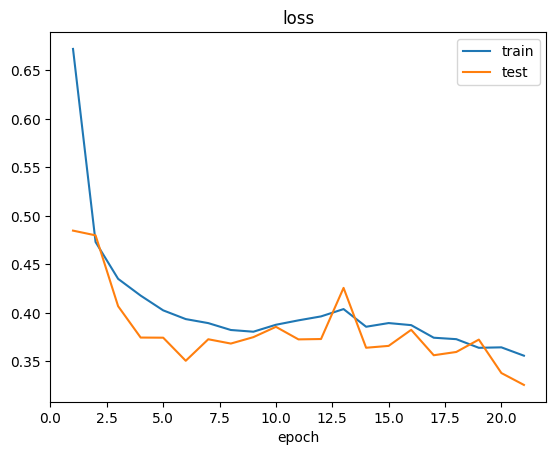

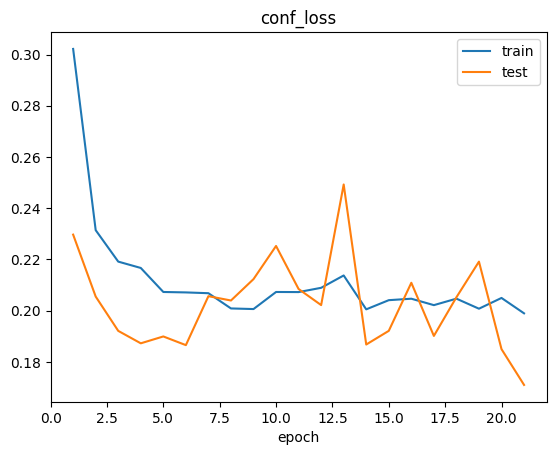

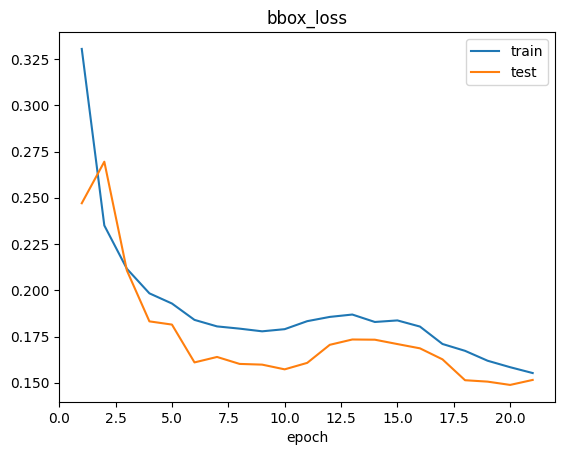

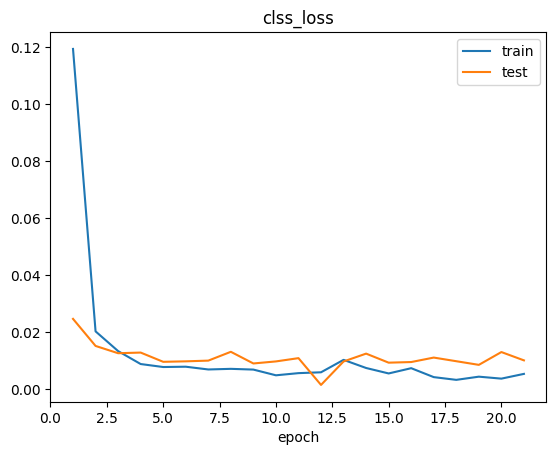

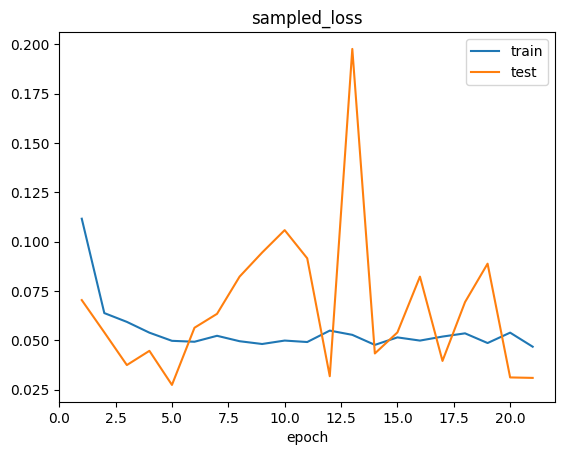

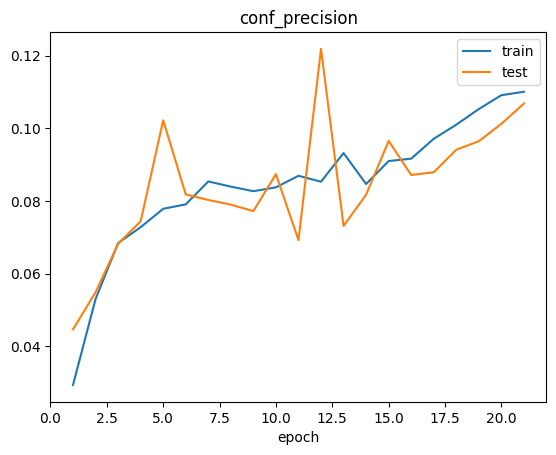

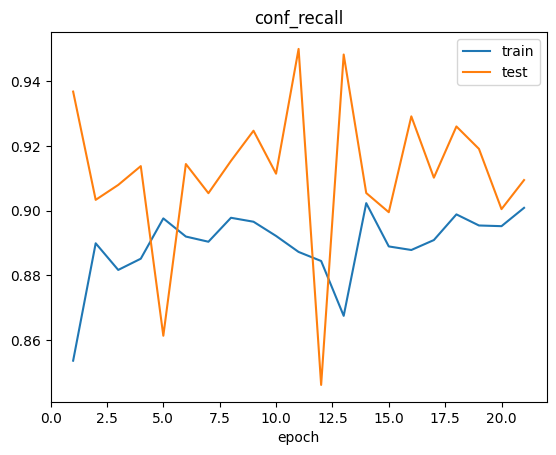

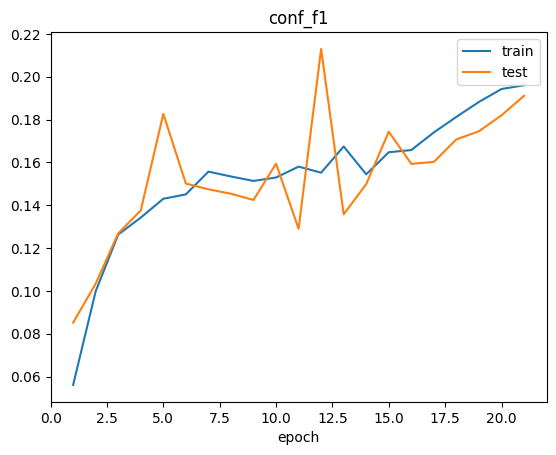

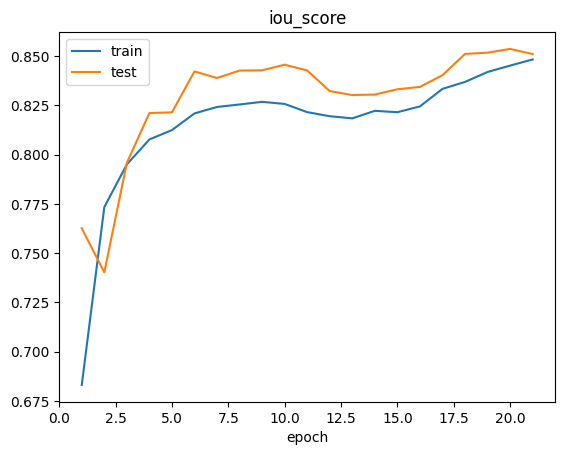

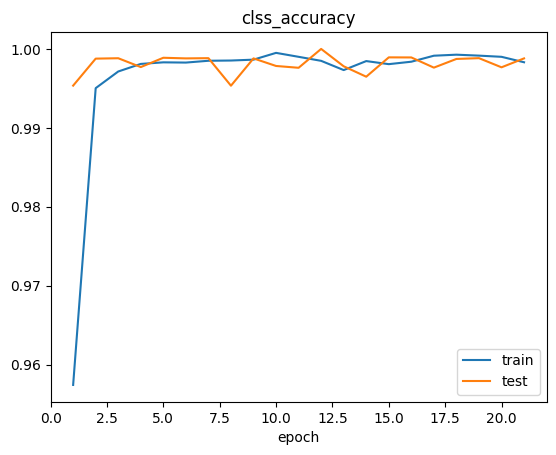

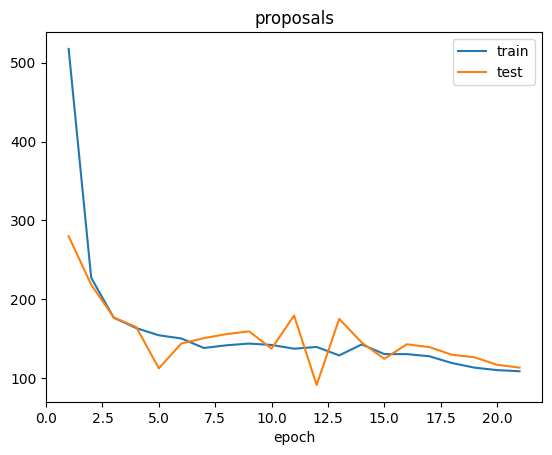

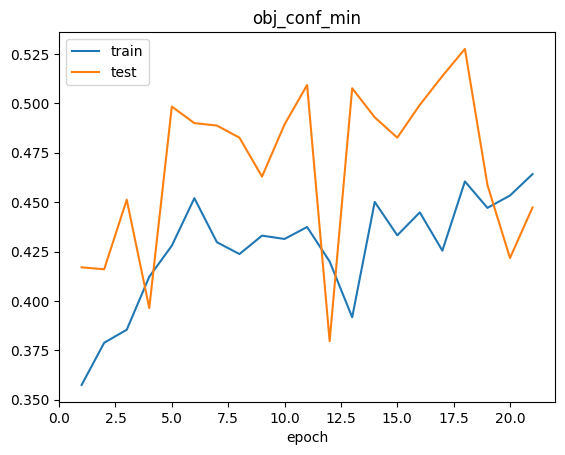

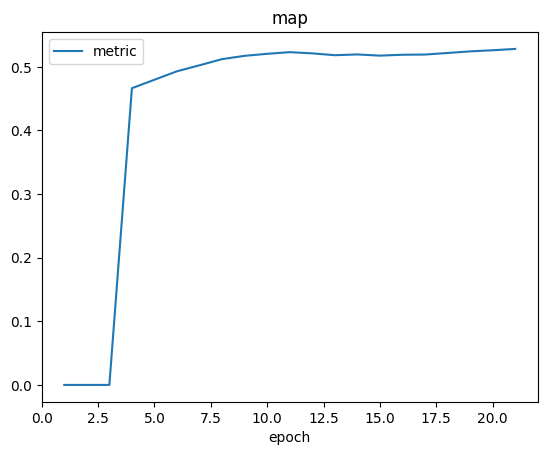

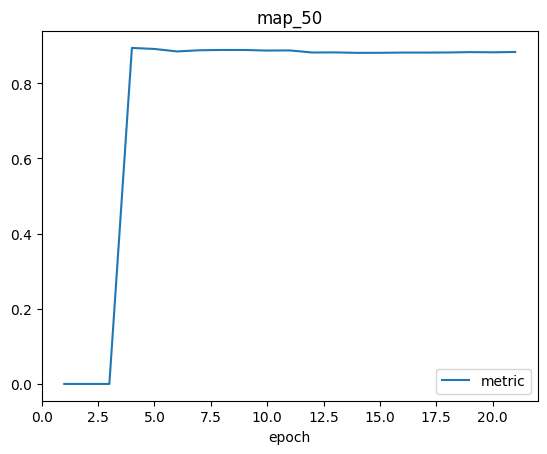

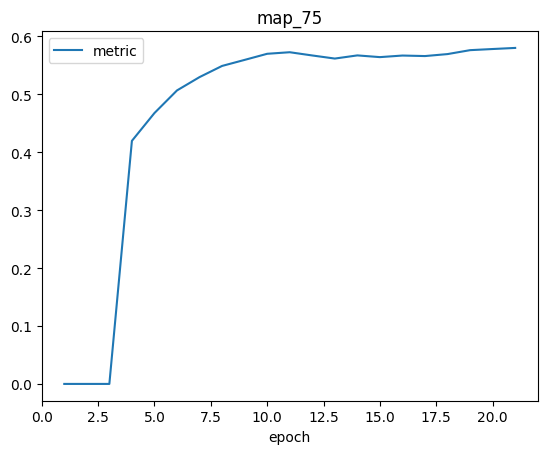

In [6]:
trainer.fit(max_train_step=0, max_test_step=0)